In [43]:
# Import libraries
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
df = pd.read_csv('survey_data.csv')

**Descriptive Statistics**

In [60]:
df.describe()

,household_size
count,197.000000
mean,3.121827
std,1.283880
min,1.000000
25%,3.000000
50%,3.000000
75%,3.000000
max,6.000000


**Correlation Analysis**

<Axes: >

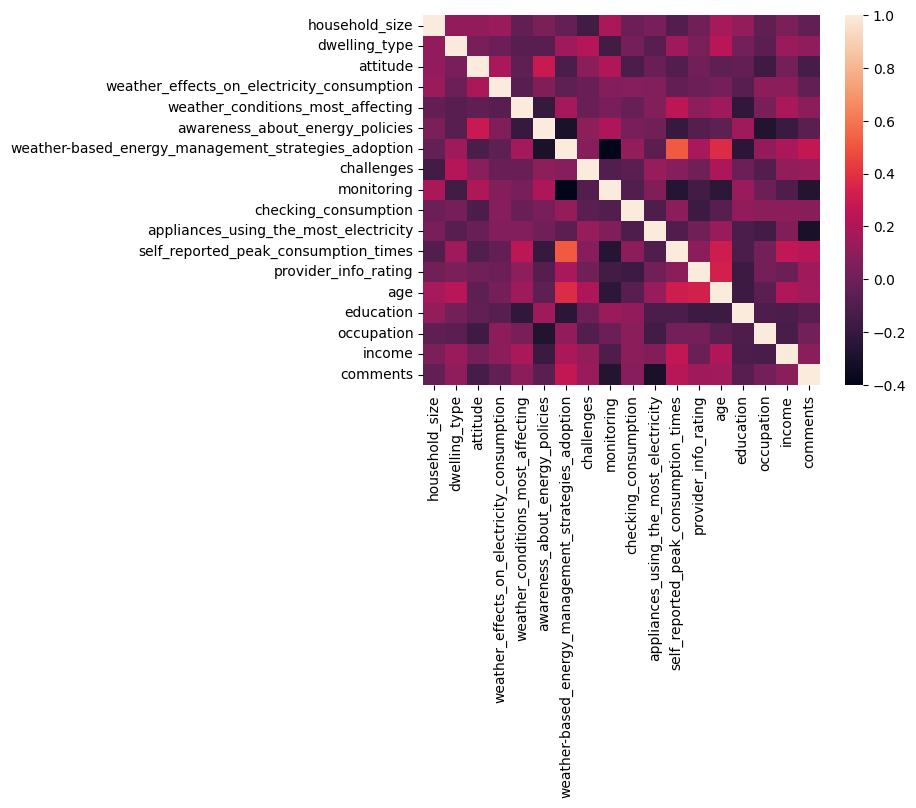

In [46]:
#import sklearn labelencoder
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col])

sns.heatmap(df_encoded.corr())

**Regression Models**

In [47]:
# Read data
data = pd.read_csv("survey_data.csv")
print(data.columns)

Index(['household_size', 'dwelling_type', 'attitude',
       'weather_effects_on_electricity_consumption',
       'weather_conditions_most_affecting', 'awareness_about_energy_policies',
       'weather-based_energy_management_strategies_adoption', 'challenges',
       'monitoring', 'checking_consumption',
       'appliances_using_the_most_electricity',
       'self_reported_peak_consumption_times', 'provider_info_rating', 'age',
       'education', 'occupation', 'income', 'comments'],
      dtype='object')


- **Load and Clean Data**

In [48]:
# loading and clean data
def load_and_clean_data(filename):

  data = pd.read_csv(filename)

  return data

# shape
data = load_and_clean_data("survey_data.csv")
print(f"Data shape: {data.shape}")

Data shape: (197, 18)


- **Separate Features and Target Variable**

In [49]:
#separating feature and target variable
X = data.drop("awareness_about_energy_policies", axis=1)
y = data["awareness_about_energy_policies"]

print(X.shape)  
print(y.head())  

(197, 17)
0      Somewhat informed
1    Somewhat uninformed
2      Somewhat informed
3    Somewhat uninformed
4    Somewhat uninformed
Name: awareness_about_energy_policies, dtype: object


- **Handle Target Variable**

In [50]:
#defining the target variable
def handle_target_variable(y):

    from sklearn.preprocessing import LabelEncoder

    le = LabelEncoder()
    y = le.fit_transform(y)
    return y

# Checking non-numeric values
if pd.api.types.is_string_dtype(y):
    y = handle_target_variable(y)

- **Encode Categorical Features**

In [51]:
#defining categorical features
def encode_categorical_features(data):

    le = LabelEncoder()
    categorical_cols = [col for col in data.columns if data[col].dtype == 'object']
    for col in categorical_cols:
        data[col] = le.fit_transform(data[col])
    return data

# Checking for categorical features (optional)
if any(pd.api.types.is_string_dtype(col) for col in X.columns):
    X = encode_categorical_features(X.copy()) 

- **Split Data into Training and Testing Sets**

In [52]:
# import train_test_split sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

- **Define and Train the Model**

In [53]:
#import labelencoder pandas sklearn
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 'housing_type'column containing 'Apartment'
def encode_categorical_features(data):

  le = LabelEncoder()
  categorical_cols = [col for col in data.columns if data[col].dtype == 'object']
  for col in categorical_cols:
      data[col] = le.fit_transform(data[col])
  return data

# encodinging before splitting
X = encode_categorical_features(X.copy())  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# training the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

- **Evaluate the Model**

In [59]:
#import mean_square_error  sklearn r2
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 0.6759496577795652
R-squared: 0.14436752179801893


In [55]:
#import pandas
import pandas as pd

# set dataframe called 'df'
monitoring_column = df['monitoring']

# Printing the entire column
print(monitoring_column)

# Printing only the first few values 
print(monitoring_column.head())

# Printing only the last few values
print(monitoring_column.tail())

0                       Yes
1                       Yes
2                       Yes
3                       Yes
4                       Yes
               ...         
192    Lack of information 
193    Lack of information 
194    Lack of information 
195    Lack of information 
196    Lack of information 
Name: monitoring, Length: 197, dtype: object
0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: monitoring, dtype: object
192    Lack of information 
193    Lack of information 
194    Lack of information 
195    Lack of information 
196    Lack of information 
Name: monitoring, dtype: object


In [58]:
#import library
import pandas as pd

# data is loaded into a dataframe called 'df'
monitoring_column = df['weather-based_energy_management_strategies_adoption']

# Printing the entire column
print(monitoring_column)

# Printing only the first few values 
print(monitoring_column.head())

# Printing only the last few values 
print(monitoring_column.tail())

0      Adjusting your thermostat settings based on th...
1                          Unplugging unused electronics
2      Adjusting your thermostat settings based on th...
3      Adjusting your thermostat settings based on th...
4      Adjusting your thermostat settings based on th...
                             ...                        
192     Washing clothes in cold water during hot weather
193     Washing clothes in cold water during hot weather
194     Washing clothes in cold water during hot weather
195     Washing clothes in cold water during hot weather
196     Washing clothes in cold water during hot weather
Name: weather-based_energy_management_strategies_adoption, Length: 197, dtype: object
0    Adjusting your thermostat settings based on th...
1                        Unplugging unused electronics
2    Adjusting your thermostat settings based on th...
3    Adjusting your thermostat settings based on th...
4    Adjusting your thermostat settings based on th...
Name: weathe